In [ ]:
# Deep learning model to Classify Movie reviews
#Binary Classification (Positive Review or Negative Review)
#imdb dataset from Keras


In [ ]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data( num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(f'training data size {train_data.shape}')
print(f'training labels size {train_labels.shape}')
print(f'testing data size {test_data.shape}')
print(f'testing labels size {test_labels.shape}')

training data size (25000,)
training labels size (25000,)
testing data size (25000,)
testing labels size (25000,)


In [ ]:
print(train_data[1][:5])
print(len(train_data[1]))

[1, 194, 1153, 194, 8255]
189


In [ ]:
word_index  = imdb.get_word_index()
reversed_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = "".join([reversed_word_index.get(i-3,'?') for i in train_data[1]])
print('negative review')
print(decoded_review)

negative review
?bighairbigboobsbadmusicandagiantsafetypinthesearethewordstobestdescribethisterriblemovieilovecheesyhorrormoviesandi'veseenhundredsbutthishadgottobeonoftheworstevermadetheplotispaperthinandridiculoustheactingisanabominationthescriptiscompletelylaughablethebestistheendshowdownwiththecopandhowheworkedoutwhothekillerisit'sjustsodamnterriblywrittentheclothesaresickeningandfunnyinequal?thehairisbiglotsofboobs?menwearthosecut?shirtsthatshowofftheir?sickeningthatmenactuallyworethemandthemusicisjust?trashthatplaysoverandoveragaininalmosteveryscenethereistrashymusicboobsand?takingawaybodiesandthegymstilldoesn'tclosefor?alljokingasidethisisatrulybadfilmwhoseonlycharmistolookbackonthedisasterthatwasthe80'sandhaveagoodoldlaughathowbadeverythingwasbackthen


In [ ]:
#One hot encoding input data to efficiently processed by Neural network
import numpy as np
def turn_into_vector(sequences,dimension = 10000):
  output_tensor = np.zeros((len(sequences),dimension))
  #populate this tensor with all the reviews
  for i in range(len(sequences)):
    output_tensor[i,sequences[i]] = 1
  return output_tensor
#vectorize samples
x_train = turn_into_vector(train_data)
x_test = turn_into_vector(test_data)
#print(output_tensor.shape)
#vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')



In [ ]:
#Neural Net arch.
#two hidden Layers with 16 hidden units each(activation:relu)
# a third layers which outputs scalar prediction of sentiment of review(classifier prediciton layer)(activation: sigmoid)(binary classifier,sigmoid)
#validation
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(32,activation = 'relu',input_shape= (10000,)))


model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics=['accuracy'])

hisroty = model.fit(partial_x_train,partial_y_train,epochs = 15,batch_size = 512, validation_data = (x_val,y_val))

model.evaluate(x_test,y_test)


Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6988 - loss: 0.5750 - val_accuracy: 0.8640 - val_loss: 0.3341
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8873 - loss: 0.3130 - val_accuracy: 0.8900 - val_loss: 0.2560
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9188 - loss: 0.2348 - val_accuracy: 0.8950 - val_loss: 0.2469
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9321 - loss: 0.1935 - val_accuracy: 0.8970 - val_loss: 0.2488
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9437 - loss: 0.1664 - val_accuracy: 0.8850 - val_loss: 0.2834
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9511 - loss: 0.1430 - val_accuracy: 0.8820 - val_loss: 0.2933
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9588 - loss: 0.1224 - val_accuracy: 0.8890 - val_loss: 0.2951
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9677 - loss: 0.1017 - val_accuracy: 0.8830 - v

[0.6111639142036438, 0.8646000027656555]

In [ ]:
history_dict = hisroty.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

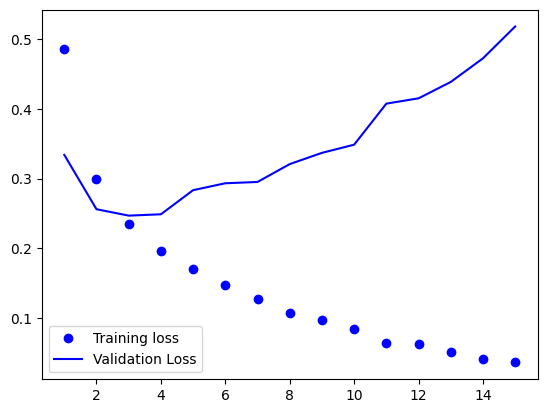

In [ ]:
#Plotting the loss
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
validation_loss_values  = history_dict['val_loss']
epochs = range(1,len(history_dict['accuracy'])+1)

plt.plot(epochs,loss_values,'bo',label = 'Training loss')
plt.plot(epochs,validation_loss_values,'b',label = 'Validation Loss')

plt.xlabel = 'Epochs'
plt.ylabel = 'Loss'
plt.legend()
plt.show()
